<a href="https://colab.research.google.com/github/ChinarVyas/Internship/blob/main/Practise_projects/Third-Phase-Practice-Projects/Bank_Marketing_term_deposits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [1]:
#! pip install -U imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc

In [3]:
dep_train=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/termdeposit_train.csv',delimiter=',')

In [4]:
dep_test=pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/termdeposit_test.csv',delimiter=',',index_col='ID')

In [5]:
dep_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
dep_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
dep_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 38441 to 34839
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        13564 non-null  int64 
 1   job        13564 non-null  object
 2   marital    13564 non-null  object
 3   education  13564 non-null  object
 4   default    13564 non-null  object
 5   balance    13564 non-null  int64 
 6   housing    13564 non-null  object
 7   loan       13564 non-null  object
 8   contact    13564 non-null  object
 9   day        13564 non-null  int64 
 10  month      13564 non-null  object
 11  duration   13564 non-null  int64 
 12  campaign   13564 non-null  int64 
 13  pdays      13564 non-null  int64 
 14  previous   13564 non-null  int64 
 15  poutcome   13564 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.8+ MB


In [8]:
dep_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

There are no null values in the training data which has 18 columns with 31647 rows ,,,, there are 8 numerical columns and 8 object type class. we also see there are no null values for test there are around 13564 entries and 17 columns

In [9]:
dep_train.drop(['pdays','previous','ID'],axis=1,inplace=True)

In [10]:
dep_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,unknown,no


In [11]:
dep_train.columns[:-1]

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome'],
      dtype='object')

creating some vizuals for better understanding on the data distribution and sub categories

In [12]:
deep=dep_train['subscribed'].value_counts()
print(deep)

print(27932/(27932+3715))

no     27932
yes     3715
Name: subscribed, dtype: int64
0.8826113059689702


In [13]:
cat_features= [feature for feature in dep_train.columns  if dep_train[feature].dtypes=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [14]:
for feature in cat_features:
  print("The feature is {} with catogaries {}".format(feature,len(dep_train[feature].unique())))

The feature is job with catogaries 12
The feature is marital with catogaries 3
The feature is education with catogaries 4
The feature is default with catogaries 2
The feature is housing with catogaries 2
The feature is loan with catogaries 2
The feature is contact with catogaries 3
The feature is month with catogaries 12
The feature is poutcome with catogaries 4
The feature is subscribed with catogaries 2


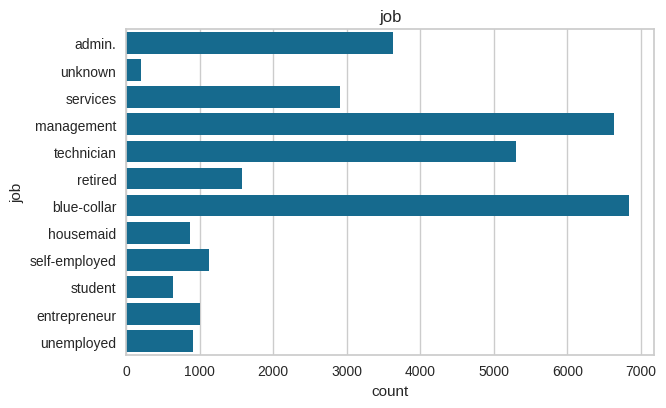

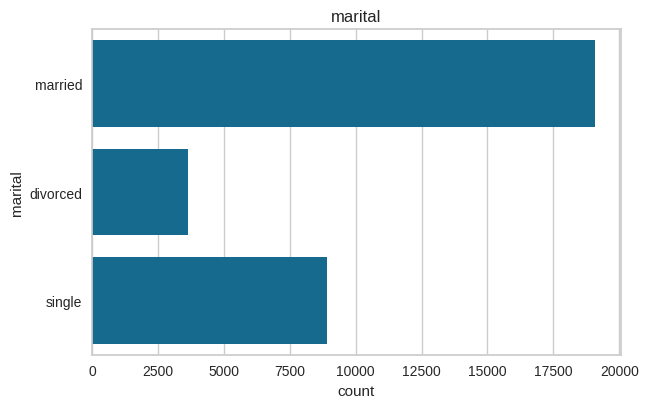

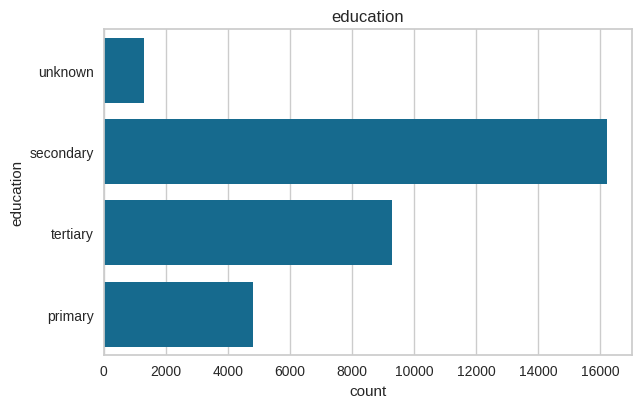

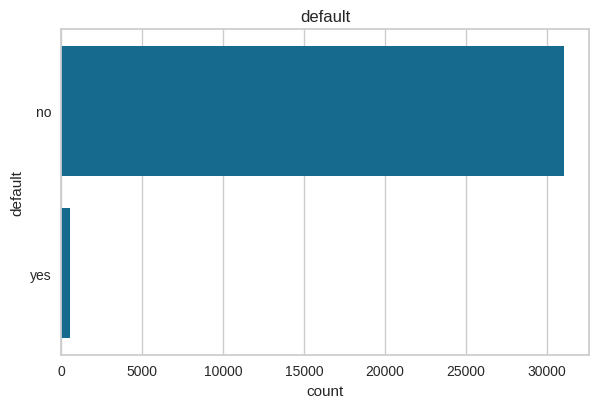

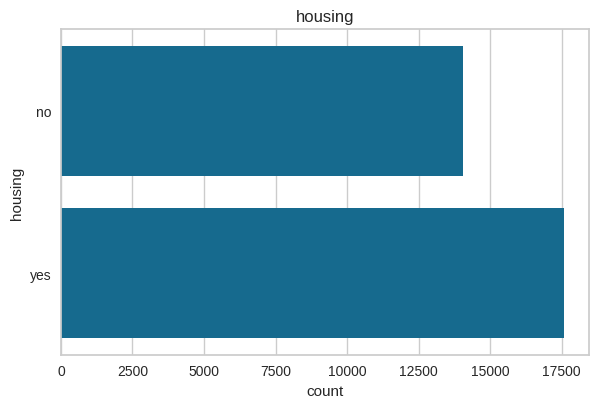

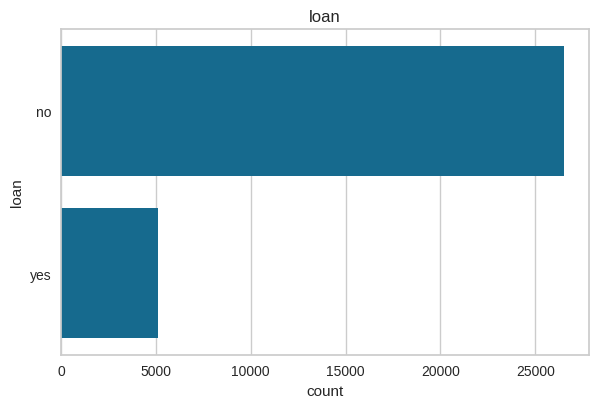

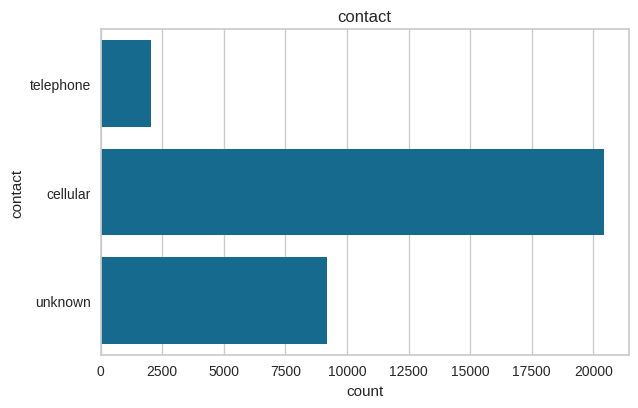

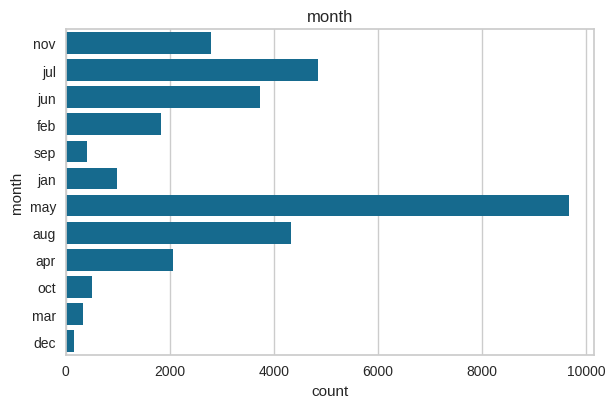

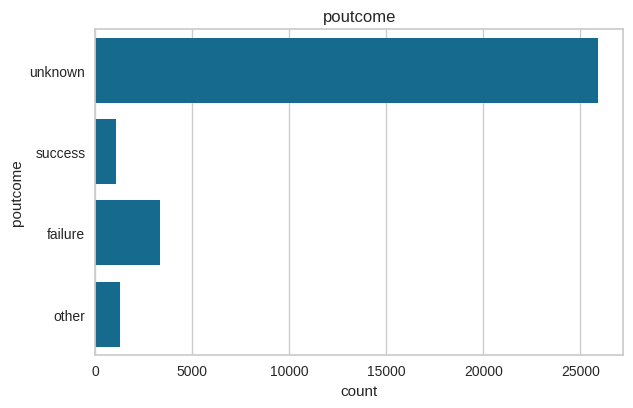

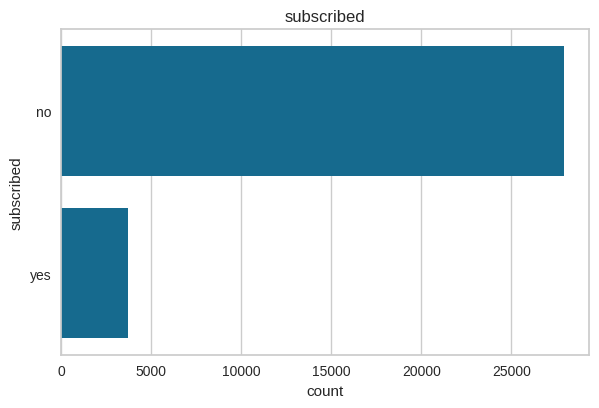

In [15]:
for cat in cat_features:
  plotnum=1
  plt.figure(figsize=(15,60))
  plt.grid(True, which='major', color='firebrick', linestyle=':')
  ax= plt.subplot(12,2,plotnum)
  sns.countplot(y=cat, data=dep_train)
  plt.title(cat)
  plt.show()

some conslusion based on the graphics
1)we see blue collar and management to be investing more in the deposits
2) married people with secondary education are more inclined towards deposits
3) better outcome when the customers are contacted on their cell phones
4) major churn is seen in the month on may.
5) we see a high % of "unknown" in contact and poutcome.
6) target(subscribed) is imbalanced with major shift towards 'no'.

In [16]:
dep_train.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [17]:
lb=LabelEncoder()
for cat in cat_features:
  dep_train[cat]=lb.fit_transform(dep_train[cat].ravel())

In [18]:
dep_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,8,116,2,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,3,1
31644,32,4,2,2,0,312,0,0,0,7,1,37,3,3,0
31645,57,9,1,1,0,225,1,0,1,15,8,22,7,0,0


running different models

In [19]:
X = dep_train.iloc[:,:-1]
y = dep_train.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25317, 14)
(25317,)
(6330, 14)
(6330,)


In [21]:
# run Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5599
           1       0.54      0.20      0.29       731

    accuracy                           0.89      6330
   macro avg       0.72      0.59      0.61      6330
weighted avg       0.86      0.89      0.86      6330

ROC_AUC_SCORE is 0.5876897110559854


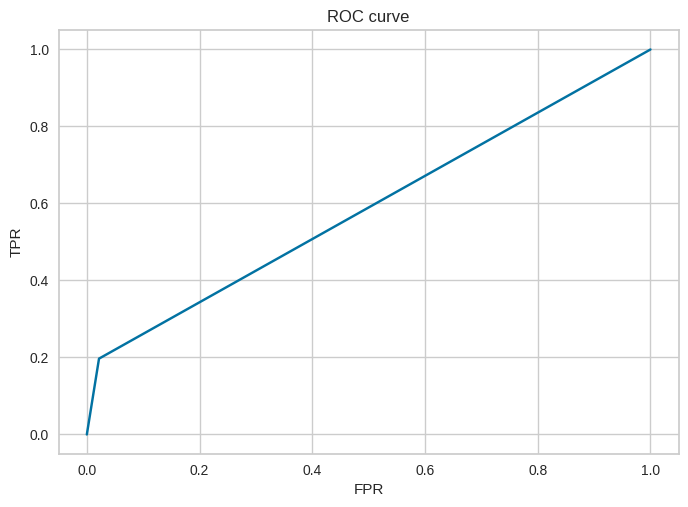

In [22]:
# getting the auc roc curve
auc = roc_auc_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5599
           1       0.43      0.48      0.45       731

    accuracy                           0.87      6330
   macro avg       0.68      0.70      0.69      6330
weighted avg       0.87      0.87      0.87      6330

ROC_AUC_SCORE is 0.6984370865522449


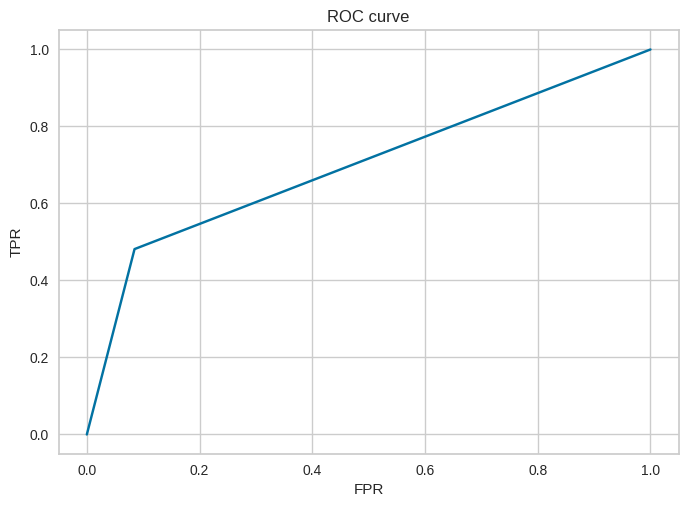

In [23]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# getting the auc roc curve
auc = roc_auc_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))



plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.62      0.40      0.49       731

    accuracy                           0.90      6330
   macro avg       0.77      0.68      0.72      6330
weighted avg       0.89      0.90      0.89      6330

ROC_AUC_SCORE is 0.6831467120007995


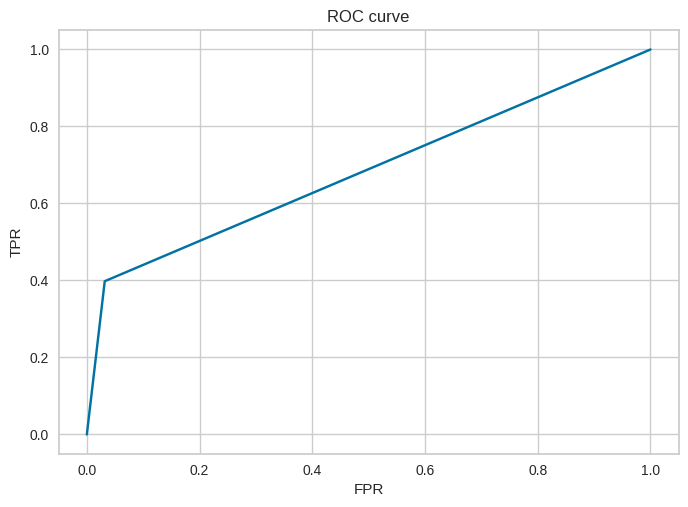

In [24]:
# run Random Forrest Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# getting the auc roc curve
auc = roc_auc_score(y_test, y_pred)
print('Classification Report:')
print(classification_report(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))



plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

**Grid-Search & Hyperparameter Tuning**

In [25]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
rfc = RandomForestClassifier()
param_grid = {
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }

grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(x_train, y_train)
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


Applying the best parameters obtained using Grid Search on Random Forest model
In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively.

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      8385
           1       0.42      0.67      0.51      1110

    accuracy                           0.85      9495
   macro avg       0.68      0.77      0.71      9495
weighted avg       0.89      0.85      0.87      9495

[[7334 1051]
 [ 363  747]]


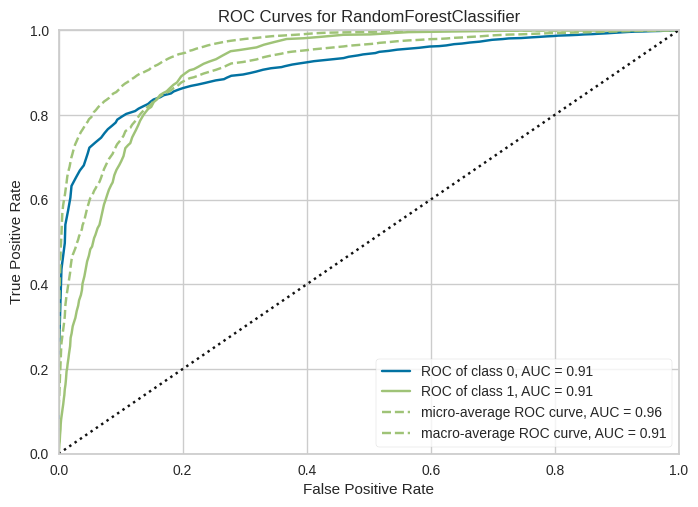

In [37]:
def grid_search_random_forrest_best(dataframe,target):
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)

    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()

    X_sm, y_sm =  smote.fit_resample(x_train, y_train)
    rfc1 = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='gini',random_state=42)
    rfc1.fit(X_sm, y_sm)
    y_pred = rfc1.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

**Now will work on test data and bring it in the format before sending it for machine learning**

In [27]:
dep_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


test has 13564 rows and 16 columns so will start with removing the unnecessary columns and tayloring it to be put for predictions and will apply the encoding

In [28]:
dep_test.drop(['pdays','previous'],axis=1,inplace=True)

In [29]:
dep_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
ID,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,unknown


In [30]:
cat_features= [feature for feature in dep_test.columns  if dep_test[feature].dtypes=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [31]:
lb=LabelEncoder()
for cat in cat_features:
  dep_test[cat]=lb.fit_transform(dep_test[cat].ravel())

In [32]:
dep_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
ID,,,,,,,,,,,,,,
38441,32,7,1,1,0,118,1,0,0,15,8,20,6,3
40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,3
3709,31,6,2,2,0,144,1,0,2,16,8,676,1,3
37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,3
12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,4,1,2,0,45,0,0,0,28,1,148,4,3
11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,3
28292,35,5,1,0,0,285,1,0,0,29,4,136,1,3


In [38]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_resample(x_train, y_train)
rfc1 = RandomForestClassifier(n_estimators=11, max_features='sqrt', max_depth=8, criterion='gini',random_state=42)
rfc1.fit(X_sm, y_sm)
y_pred = rfc1.predict(dep_test)

In [39]:
print(len(y_pred))

13564


In [40]:
predict=pd.DataFrame(y_pred)

In [41]:
predict.value_counts()

0    10879
1     2685
dtype: int64